In [15]:
import psycopg2
import json
import matplotlib.pyplot as plt

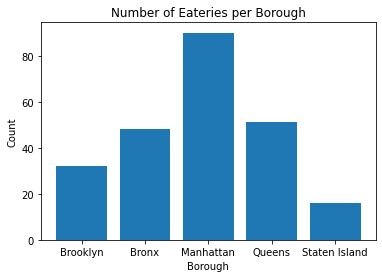

In [31]:
username = ""
password = ""
database = ""



with open('/Users/sunpyohong/Desktop/Database Management/hsump1996-homework08/src/config.json', "r") as handler:

    data = json.load(handler)

    username = data["username"]
    password = data["password"]
    database = data["database"]


conn = psycopg2.connect(dbname=str(database), user=str(username), password=str(password))
    
cur = conn.cursor()



q =  """create or replace view borough_report as
select eatery_id, name, park_id, CASE
    WHEN park_id LIKE 'X%' THEN 'Bronx'
    WHEN park_id LIKE 'B%' THEN 'Brooklyn'
    WHEN park_id LIKE 'M%' THEN 'Manhattan'
    WHEN park_id LIKE 'Q%' THEN 'Queens'
    WHEN park_id LIKE 'R%' THEN 'Staten Island'
END AS borough
FROM eatery e;
"""

b =  """select borough, count(borough)
from borough_report
group by borough;
"""

cur.execute(q);
conn.commit()
cur.execute(b);

borough = []
count = []

for row in cur:
   borough.append(str(row[0]))
   count.append(int(row[1]))

plt.bar(borough, count)
plt.xlabel('Borough')
plt.ylabel('Count')
plt.title('Number of Eateries per Borough')
plt.show()

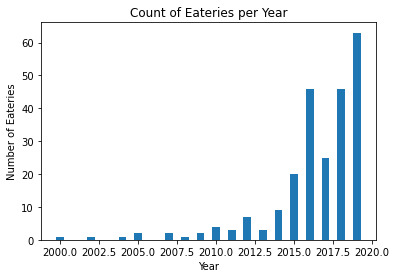

In [30]:
s = """ select extract(YEAR from start_date) as year, count(name) as number_of_eateries
from eatery
where extract(YEAR from start_date) IS NOT NULL
group by year; """


cur.execute(s);

year = []
number_of_eateries = []

for result in cur:
    year.append(int(result[0]))
    number_of_eateries.append(int(result[1]))

plt.bar(year, number_of_eateries, width=0.5)

plt.xlabel('Year')
plt.ylabel('Number of Eateries')
plt.title('Count of Eateries per Year')

plt.show()
